Depth to 550 kg/m^3: 12.0 m
Depth to 800 kg/m^3: 67.3 m
Age at 550 kg/m^3 density: 535.9 years
Age at 800 kg/m^3 density: 4327.9 years


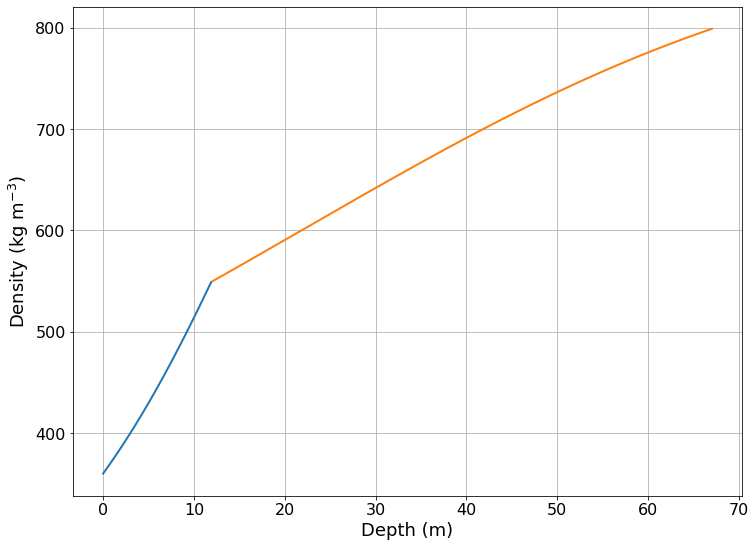

In [41]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

# define all parameters

rho_i=900
rho_0=360   
c1=1.6e-4
c2=.43e-4
e0=(rho_i-rho_0)/rho_0
K1=np.log(e0)+e0
K2=.652

a=10 # accumulation rate

# define the depth vs density functions

def z1(rho):
    return (1/(c1*rho_i)*(K1-np.log((rho_i-rho)/rho)-(rho_i-rho)/rho))

def z2(rho):
    return (1/(c2*rho_i)*(K2-np.log((rho_i-rho)/rho)-(rho_i-rho)/rho))

# plot the density vs depth functions

rho1 = np.arange(rho_0,550)
rho2 = np.arange(550,800)
plt.figure(figsize=(12,9))
plt.plot(z1(rho1),rho1, linewidth=2)
plt.plot(z2(rho2),rho2, linewidth=2)
plt.xlabel('Depth (m)', fontsize=18)
plt.ylabel('Density (kg m$^{-3}$)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('densification.png')

# depth to 550 and 800 kg/m^3

z550=z1(550)
z800=z2(800)
print('Depth to 550 kg/m^3: ' + '{:.1f}'.format(z550) + ' m')
print('Depth to 800 kg/m^3: ' + '{:.1f}'.format(z800) + ' m')

# age calculation

t1=(z550*550-integrate.quad(z1,360,550)[0])/a;
t2=t1+(-integrate.quad(z2,550,800)[0]+z800*800-z550*550)/a;
print('Age at 550 kg/m^3 density: ' + '{:.1f}'.format(t1) + ' years')
print('Age at 800 kg/m^3 density: ' + '{:.1f}'.format(t2) + ' years')